# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [42]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from pprint import pprint
from datetime import datetime

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
print(api_key)

34946809ba2cda9b50cfd5ce64851929


In [51]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []
temp=[]
humi=[]
cloud=[]
wind=[]
lat = []
lon=[]
country=[]
date=[]

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
#print(cities)

In [52]:
print(len(cities))

610


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [26]:
city

'sorland'

In [53]:
#Build url
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key
end = 1551398399
start = 1551312000
query_url = f"{url}&q="
response = requests.get(query_url + city)
data = response.json()
pprint(data)

{'base': 'stations',
 'clouds': {'all': 75},
 'cod': 200,
 'coord': {'lat': 19.71, 'lon': -155.08},
 'dt': 1552350755,
 'id': 5855927,
 'main': {'humidity': 60,
          'pressure': 1019,
          'temp': 71.15,
          'temp_max': 75.2,
          'temp_min': 64.99},
 'name': 'Hilo',
 'rain': {'1h': 15.75},
 'sys': {'country': 'US',
         'id': 7881,
         'message': 0.005,
         'sunrise': 1552408269,
         'sunset': 1552451346,
         'type': 1},
 'visibility': 11265,
 'weather': [{'description': 'heavy intensity rain',
              'icon': '10n',
              'id': 502,
              'main': 'Rain'}],
 'wind': {'deg': 70, 'speed': 16.11}}


In [54]:
#Build the loop
x=0
y=1
print("Beginning Data Retrieval")    
print("--------------------------")
city_names = []
for city in cities:
    try:
        print(f"Processing Record" + " " + str(x) + " " + "of Set" + " " + str(y) + " "+ "|" + " " + city + ".")
        response = requests.get(query_url + city).json()
        city_names.append(response['name'])
        lat.append(response['coord']['lat'])
        lon.append(response['coord']['lon'])
        temp.append(response['main']['temp_max'])
        humi.append(response['main']['humidity'])
        cloud.append(response['clouds']['all'])
        wind.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
    
        
    except (KeyError, IndexError):
        print("City not found... skipping.")
   
    time.sleep(2)
    x+=1    
    if x % 50 == 0:
        y+=1
        x=0
        
           
print("--------------------------")
print("Data Retrieval Complete") 
print("--------------------------")    

#pprint(response)

Beginning Data Retrieval
--------------------------
Processing Record 0 of Set 1 | dikson.
Processing Record 1 of Set 1 | bredasdorp.
Processing Record 2 of Set 1 | jamestown.
Processing Record 3 of Set 1 | punta arenas.
Processing Record 4 of Set 1 | sentyabrskiy.
City not found... skipping.
Processing Record 5 of Set 1 | sisimiut.
Processing Record 6 of Set 1 | mahebourg.
Processing Record 7 of Set 1 | yeppoon.
Processing Record 8 of Set 1 | tsihombe.
City not found... skipping.
Processing Record 9 of Set 1 | banjar.
Processing Record 10 of Set 1 | saleaula.
City not found... skipping.
Processing Record 11 of Set 1 | harnosand.
Processing Record 12 of Set 1 | portland.
Processing Record 13 of Set 1 | formoso do araguaia.
City not found... skipping.
Processing Record 14 of Set 1 | bluff.
Processing Record 15 of Set 1 | grindavik.
Processing Record 16 of Set 1 | ambon.
Processing Record 17 of Set 1 | taolanaro.
City not found... skipping.
Processing Record 18 of Set 1 | saint-philippe.

Processing Record 32 of Set 4 | vila do maio.
Processing Record 33 of Set 4 | ozgon.
City not found... skipping.
Processing Record 34 of Set 4 | petropavlovsk-kamchatskiy.
Processing Record 35 of Set 4 | port hardy.
Processing Record 36 of Set 4 | oktyabrskoye.
Processing Record 37 of Set 4 | kogon.
Processing Record 38 of Set 4 | dahuk.
City not found... skipping.
Processing Record 39 of Set 4 | alihe.
Processing Record 40 of Set 4 | hirara.
Processing Record 41 of Set 4 | narbonne.
Processing Record 42 of Set 4 | moravska trebova.
Processing Record 43 of Set 4 | tilichiki.
Processing Record 44 of Set 4 | frolovo.
Processing Record 45 of Set 4 | fort saint john.
City not found... skipping.
Processing Record 46 of Set 4 | tatawin.
City not found... skipping.
Processing Record 47 of Set 4 | kommunisticheskiy.
Processing Record 48 of Set 4 | ithaca.
Processing Record 49 of Set 4 | yar-sale.
Processing Record 0 of Set 5 | bambous virieux.
Processing Record 1 of Set 5 | pekin.
Processing R

Processing Record 15 of Set 8 | toliary.
City not found... skipping.
Processing Record 16 of Set 8 | gizo.
Processing Record 17 of Set 8 | waipawa.
Processing Record 18 of Set 8 | atbasar.
Processing Record 19 of Set 8 | kirakira.
Processing Record 20 of Set 8 | tautira.
Processing Record 21 of Set 8 | hualmay.
Processing Record 22 of Set 8 | ettlingen.
Processing Record 23 of Set 8 | bodden town.
Processing Record 24 of Set 8 | port macquarie.
Processing Record 25 of Set 8 | polewali.
Processing Record 26 of Set 8 | langsa.
Processing Record 27 of Set 8 | coihaique.
Processing Record 28 of Set 8 | victoria.
Processing Record 29 of Set 8 | karratha.
Processing Record 30 of Set 8 | rize.
Processing Record 31 of Set 8 | rocha.
Processing Record 32 of Set 8 | candido mendes.
Processing Record 33 of Set 8 | potgietersrus.
City not found... skipping.
Processing Record 34 of Set 8 | walvis bay.
Processing Record 35 of Set 8 | kavieng.
Processing Record 36 of Set 8 | middle river.
Processing 

Processing Record 48 of Set 11 | djibo.
Processing Record 49 of Set 11 | sokoto.
Processing Record 0 of Set 12 | corning.
Processing Record 1 of Set 12 | asfi.
City not found... skipping.
Processing Record 2 of Set 12 | mounana.
Processing Record 3 of Set 12 | margherita.
Processing Record 4 of Set 12 | sao domingos.
Processing Record 5 of Set 12 | severo-yeniseyskiy.
Processing Record 6 of Set 12 | sal rei.
Processing Record 7 of Set 12 | namibe.
Processing Record 8 of Set 12 | winneba.
Processing Record 9 of Set 12 | marawi.
Processing Record 10 of Set 12 | lloydminster.
Processing Record 11 of Set 12 | pemangkat.
City not found... skipping.
Processing Record 12 of Set 12 | lasa.
Processing Record 13 of Set 12 | ewo.
Processing Record 14 of Set 12 | flinders.
Processing Record 15 of Set 12 | severnyy.
City not found... skipping.
Processing Record 16 of Set 12 | manikganj.
City not found... skipping.
Processing Record 17 of Set 12 | mattawa.
Processing Record 18 of Set 12 | asau.
City

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | lompoc
Processing Record 2 of Set 1 | klaksvik
Processing Record 3 of Set 1 | bisignano
Processing Record 4 of Set 1 | bengkulu
City not found. Skipping...
Processing Record 5 of Set 1 | hilo
Processing Record 6 of Set 1 | rikitea
Processing Record 7 of Set 1 | ahipara
Processing Record 8 of Set 1 | lebu
Processing Record 9 of Set 1 | hamilton
Processing Record 10 of Set 1 | castro
Processing Record 11 of Set 1 | ashland
Processing Record 12 of Set 1 | ushuaia
Processing Record 13 of Set 1 | haines junction
Processing Record 14 of Set 1 | punta arenas
Processing Record 15 of Set 1 | salalah
Processing Record 16 of Set 1 | port macquarie
Processing Record 17 of Set 1 | mataura
Processing Record 18 of Set 1 | saint-philippe
Processing Record 19 of Set 1 | kaitangata
Processing Record 20 of Set 1 | souillac
Processing Record 21 of Set 1 | srednekolymsk
Processing Record 22 of Set 1 | busselton
Proce

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [55]:
#Build the Dataframe
data_df = pd.DataFrame({
    "City": city_names,
    "Cloudiness": cloud,
    "Country": country,
    "Date": date,
    "Humidity": humi,
    "Lat": lat,
    "Lng": lon,
    "Max Temp": temp,
    "Wind Speed": wind
})
data_df.drop_duplicates('City')
data_df.head(10)


,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Dikson,24,RU,1552350732,78,73.51,80.55,-1.09,13.13
1,Bredasdorp,36,ZA,1552350658,94,-34.53,20.04,69.80,1.12
2,Jamestown,36,AU,1552350800,94,-33.21,138.60,61.92,8.99
3,Punta Arenas,20,CL,1552350191,65,-53.16,-70.91,46.40,11.41
4,Sisimiut,20,GL,1552350807,64,66.94,-53.67,-9.19,1.28
5,Mahebourg,20,MU,1552350547,88,-20.41,57.70,75.00,3.36
6,Yeppoon,8,AU,1552348800,55,-23.13,150.74,87.80,6.93
7,Banjar,88,ID,1552350816,97,-7.37,108.54,73.62,3.29
8,Harnosand,0,SE,1552350525,66,62.63,17.94,18.00,4.70
9,Portland,75,US,1552350727,40,45.52,-122.67,57.99,10.29


In [56]:
#Display Counts
data_df.count()

City          547
Cloudiness    547
Country       547
Date          547
Humidity      547
Lat           547
Lng           547
Max Temp      547
Wind Speed    547
dtype: int64

In [57]:
#Export to CSV
data_df.to_csv("City Data.csv")

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

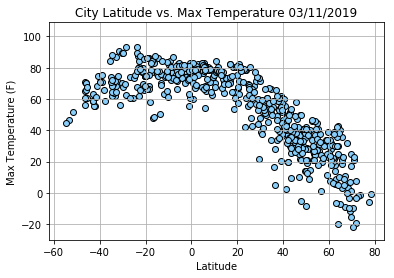

In [63]:
#Start the Scatter Plot
plt.scatter(lat, temp, marker="o", facecolors="lightskyblue", edgecolors="black")

# Set the upper and lower limits of our y axis
plt.ylim(-30,109)

# Set the upper and lower limits of our x axis
plt.xlim(-62,84)

# Create a title, x label, and y label for our chart
plt.title(f"City Latitude vs. Max Temperature {datetime.now().strftime('%m/%d/%Y')}")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")

#Save and Show the fig
plt.savefig("../Images/MaxTemp.png")
plt.grid()
plt.show()

#### Latitude vs. Humidity Plot

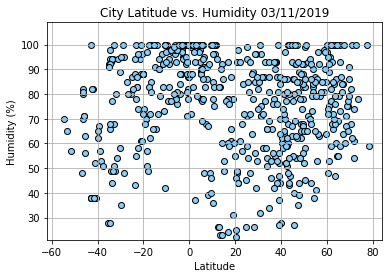

In [64]:
#Start the Scatter Plot
plt.scatter(lat, humi, marker="o", facecolors="lightskyblue", edgecolors="black")

# Set the upper and lower limits of our y axis
plt.ylim(21,109)

# Set the upper and lower limits of our x axis
plt.xlim(-62,84)

# Create a title, x label, and y label for our chart
plt.title(f"City Latitude vs. Humidity {datetime.now().strftime('%m/%d/%Y')}")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

#Save and Show the fig
plt.savefig("../Images/Humidity.png")
plt.grid()
plt.show()

#### Latitude vs. Cloudiness Plot

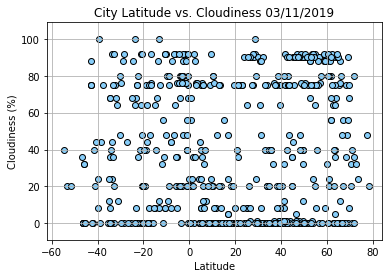

In [67]:
#Start the Scatter Plot
plt.scatter(lat, cloud, marker="o", facecolors="lightskyblue", edgecolors="black")

# Set the upper and lower limits of our y axis
plt.ylim(-9,109)

# Set the upper and lower limits of our x axis
plt.xlim(-62,84)

# Create a title, x label, and y label for our chart
plt.title(f"City Latitude vs. Cloudiness {datetime.now().strftime('%m/%d/%Y')}")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

#Save and Show the fig
plt.savefig("../Images/Cloudiness.png")
plt.grid()
plt.show()

#### Latitude vs. Wind Speed Plot

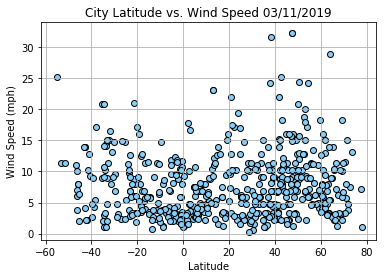

In [68]:
#Start the Scatter Plot
plt.scatter(lat, wind, marker="o", facecolors="lightskyblue", edgecolors="black")

# Set the upper and lower limits of our y axis
plt.ylim(-1,34)

# Set the upper and lower limits of our x axis
plt.xlim(-62,84)

# Create a title, x label, and y label for our chart
plt.title(f"City Latitude vs. Wind Speed {datetime.now().strftime('%m/%d/%Y')}")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

#Save and Show the fig
plt.savefig("../Images/WindSpeed.png")
plt.grid()
plt.show()